In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/GLEAM_LivestockEmissions.csv", index_col=0)

In [4]:
display(df)

,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),"Feed, CO2 (kg CO2e)",...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
Region,,,,,,,,,,,,,,,,,,,,,
Global,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12,3.534729e+11,...,1.740732e+11,7.419864e+11,4.687954e+10,3.870062e+11,2.509275e+12,1.394522e+11,1.649130e+11,4.215542e+10,1.585653e+10,9.955932e+10
Global,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11,1.382340e+11,...,7.166208e+10,2.543885e+11,1.497421e+10,NaN,8.856352e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
Global,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11,2.152389e+11,...,1.024111e+11,4.875979e+11,3.190534e+10,3.870062e+11,1.623640e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
Global,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11,1.113982e+11,...,5.253660e+10,4.267612e+11,8.194330e+09,3.870062e+11,9.969096e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
Global,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11,4.404003e+10,...,2.156126e+10,1.587838e+11,2.412100e+09,NaN,3.369018e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Europe,Chicken,Layers,Aggregated,22.0,6.025046e+08,1.323780e+10,9.323248e+09,3.332783e+08,3.581273e+09,3.975525e+09,...,1.730664e+09,8.947222e+08,3.772893e+09,NaN,NaN,3.332783e+08,9.558861e+08,5.803359e+08,3.967689e+07,9.548171e+08
Western Europe,Chicken,Layers,Eggs,21.9,5.681959e+08,1.243977e+10,8.761355e+09,3.119144e+08,3.366500e+09,3.735033e+09,...,1.627899e+09,8.506486e+08,3.553528e+09,NaN,NaN,3.119144e+08,8.879524e+08,5.388376e+08,3.661863e+07,8.973380e+08
Western Europe,Chicken,Layers,Meat,23.3,3.430870e+07,7.980299e+08,5.618929e+08,2.136393e+07,2.147731e+08,2.404925e+08,...,1.027658e+08,4.407360e+07,2.193647e+08,NaN,NaN,2.136393e+07,6.793370e+07,4.149825e+07,3.058259e+06,5.747911e+07


In [5]:
print(df['Commodity'].unique())


['Aggregated' 'Milk' 'Meat' 'Eggs']


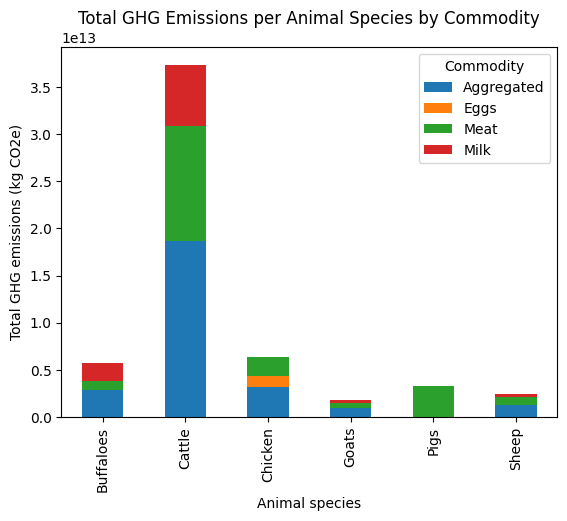

In [6]:
emissions_per_species_commodity = df.groupby(['Animal species', 'Commodity'])['Total GHG emissions (kg CO2e)'].sum().unstack()

emissions_per_species_commodity.plot(kind='bar', stacked=True)

plt.ylabel('Total GHG emissions (kg CO2e)')
plt.title('Total GHG Emissions per Animal Species by Commodity')
plt.show()

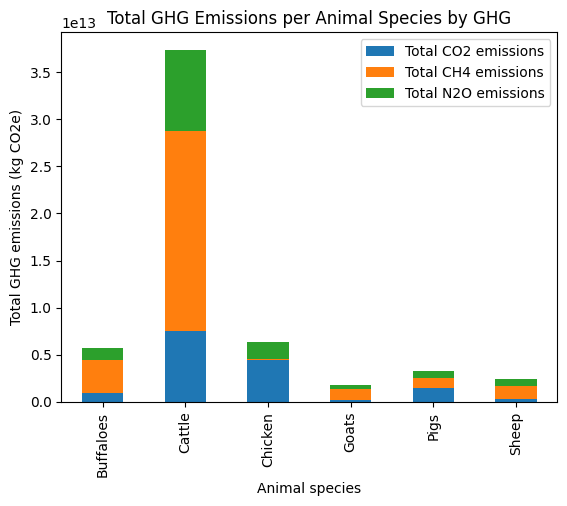

In [7]:
# Sum the emissions for each GHG type
df['Total CO2 emissions'] = df['Total CO2 emissions (kg CO2e)']
df['Total CH4 emissions'] = df['Total CH4 emissions (kg CO2e)']
df['Total N2O emissions'] = df['Total N2O emissions (kg CO2e)']

# Group by Animal species and GHG, then sum the emissions
emissions_per_species_ghg = df.groupby(['Animal species'])[['Total CO2 emissions', 'Total CH4 emissions', 'Total N2O emissions']].sum()

# Plot the results
emissions_per_species_ghg.plot(kind='bar', stacked=True)

plt.ylabel('Total GHG emissions (kg CO2e)')
plt.title('Total GHG Emissions per Animal Species by GHG')
plt.show()